In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df2016 = pd.read_csv('./2016.csv')
df2017 = pd.read_csv('./2017.csv')
df2018 = pd.read_csv('./2018.csv')

In [4]:
df = pd.concat([df2016,df2017,df2018]).drop("Unnamed: 0",axis=1).reset_index(drop=True)

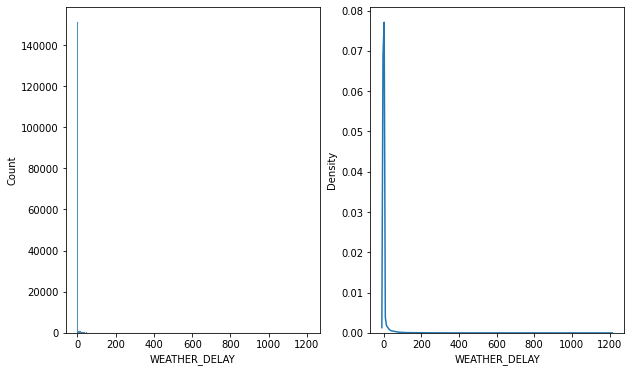

In [12]:
fig,axes = plt.subplots(ncols=2,figsize=(10,6))
sns.histplot(ax=axes[0],x=df['WEATHER_DELAY'],bins=500)
sns.kdeplot(ax=axes[1],x=df['WEATHER_DELAY'])

In [7]:
df['time'] = pd.to_datetime(df['time'],format= "%Y-%m-%d %H:%M:%S")
df['month'] = df['time'].dt.month
df['hours'] = df['time'].dt.hour
df['year'] = df['time'].dt.year

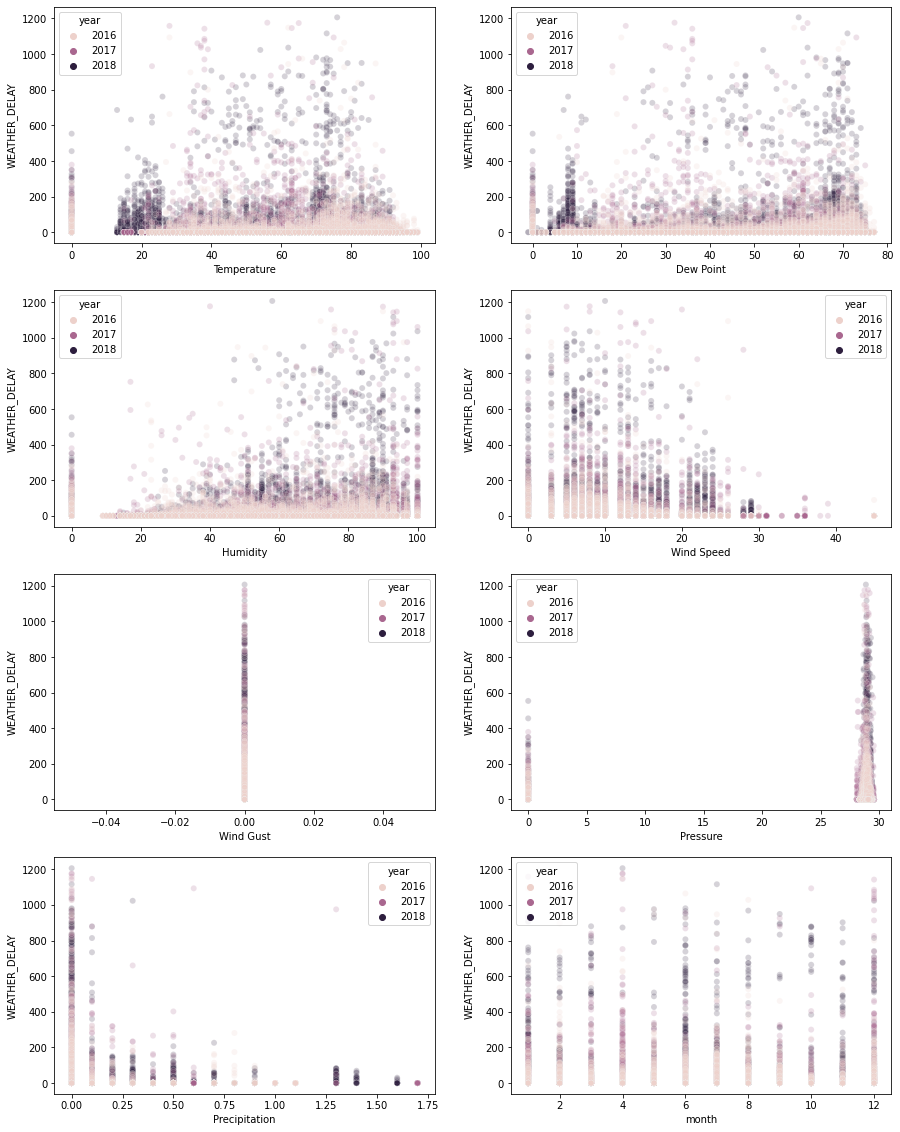

In [14]:
fig,axes = plt.subplots(nrows=4,ncols=2,figsize=(15,20))
#['Temperature','Dew Point','Humidity','Wind Speed','Wind Gust','Pressure','Precipitation','month']
sns.scatterplot(ax=axes[0][0],x=df['Temperature'],y=df['WEATHER_DELAY'],alpha=0.2,hue=df['year'])
sns.scatterplot(ax=axes[0][1],x=df['Dew Point'],y=df['WEATHER_DELAY'],alpha=0.2,hue=df['year'])
sns.scatterplot(ax=axes[1][0],x=df['Humidity'],y=df['WEATHER_DELAY'],alpha=0.2,hue=df['year'])
sns.scatterplot(ax=axes[1][1],x=df['Wind Speed'],y=df['WEATHER_DELAY'],alpha=0.2,hue=df['year'])
sns.scatterplot(ax=axes[2][0],x=df['Wind Gust'],y=df['WEATHER_DELAY'],alpha=0.2,hue=df['year'])
sns.scatterplot(ax=axes[2][1],x=df['Pressure'],y=df['WEATHER_DELAY'],alpha=0.2,hue=df['year'])
sns.scatterplot(ax=axes[3][0],x=df['Precipitation'],y=df['WEATHER_DELAY'],alpha=0.2,hue=df['year'])
sns.scatterplot(ax=axes[3][1],x=df['month'],y=df['WEATHER_DELAY'],alpha=0.2,hue=df['year'])

In [16]:
def mapiings(x):
    if(x==0):
        return 0
    elif(x<30):
        return 30
    elif(x<60):
        return 60
    elif(x<120):
        return 120
    else:
        return 121
df['delay'] = df['WEATHER_DELAY'].map(mapiings)

In [17]:
df['delay'].value_counts()

121    965987
0      150359
30       8205
60       2541
120      1612
Name: delay, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128704 entries, 0 to 1128703
Data columns (total 33 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   FL_DATE              1128704 non-null  object        
 1   ORIGIN               1128704 non-null  object        
 2   DEST                 1128704 non-null  object        
 3   CRS_DEP_TIME         1128704 non-null  int64         
 4   DEP_TIME             1128704 non-null  float64       
 5   DEP_DELAY            1128153 non-null  float64       
 6   WHEELS_OFF           1128542 non-null  float64       
 7   WHEELS_ON            1128314 non-null  float64       
 8   TAXI_IN              1128314 non-null  float64       
 9   CRS_ARR_TIME         1128704 non-null  int64         
 10  ARR_DELAY            1125608 non-null  float64       
 11  CANCELLED            1128704 non-null  float64       
 12  DIVERTED             1128704 non-null  float64       
 1

In [19]:
df.loc[df['Condition']=='0','Condition'] = None

In [20]:
df['Condition'].value_counts()

Fair                       309117
Mostly Cloudy              303439
Cloudy                     183672
Partly Cloudy              173335
Light Rain                  48586
Fog                         15619
Light Drizzle               10863
Rain                         6769
Fair / Windy                 6189
Mostly Cloudy / Windy        3626
Thunder                      3236
Cloudy / Windy               2938
Thunder in the Vicinity      2891
Drizzle and Fog              2812
Light Rain with Thunder      2511
Heavy Rain                   2417
T-Storm                      2234
Partly Cloudy / Windy        2151
Mist                         1436
Haze                         1270
Heavy T-Storm                1218
Light Rain / Windy           1040
Smoke                         941
Heavy Rain / Windy            668
Light Snow                    641
Rain / Windy                  508
Heavy T-Storm / Windy         391
Wintry Mix                    282
Thunder / Windy               247
T-Storm / Wind

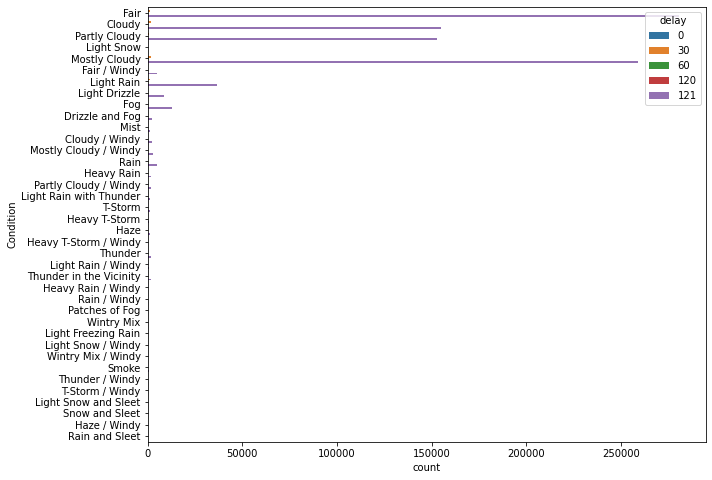

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(y=df[df['delay']>0]['Condition'],hue=df['delay'])

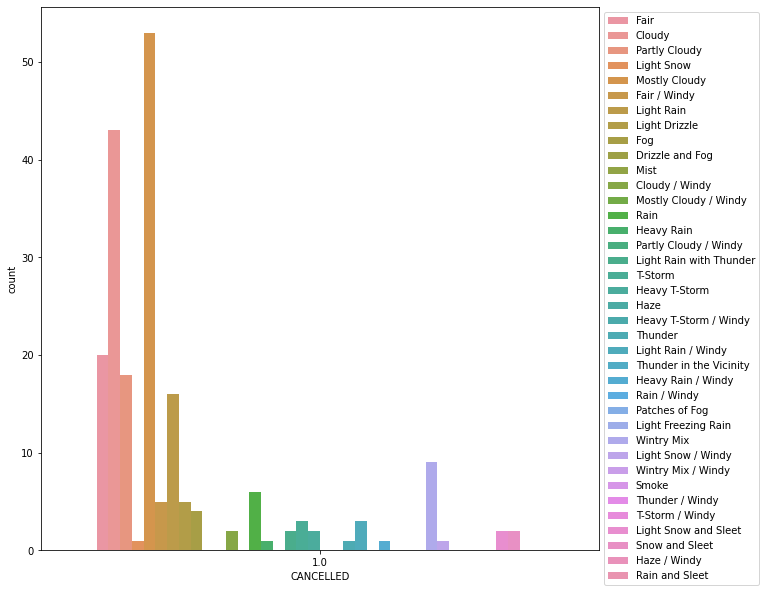

In [44]:
plt.figure(figsize=(10,10))
sns.countplot(x=df[df['CANCELLED']==1]['CANCELLED'],hue=df['Condition'])
plt.legend(bbox_to_anchor=(1,1))